# ANOVA

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Data frames.
import pandas as pd

## More Samples

In [2]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

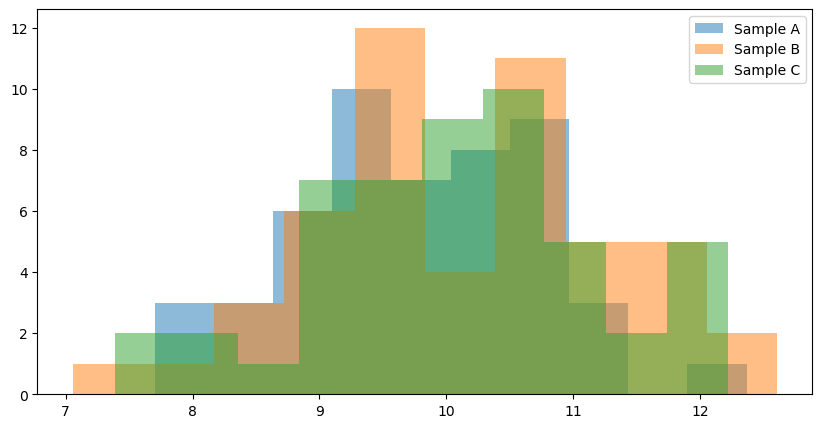

In [3]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [4]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(-1.659654966550531, 0.10018073999475076)

In [5]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(1.659654966550531, 0.10018073999475076)

In [6]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(-1.6626073915948998, 0.0995863445711748)

In [7]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(0.02904746280492165, 0.9768858089649308)

## $n$ Samples

In [8]:
# Number of samples.
n = 4

In [9]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [10]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [11]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [12]:
# Suppose we had 6 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

In [13]:
def simulate_ttest(alpha=0.05):
    # Geneate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [14]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

487

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

In [15]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [16]:
# Create data frame.
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,24.605090,22.470672,24.514637
1,30.594173,20.752860,20.496276
2,28.492189,31.194956,27.771930
3,25.974913,30.004408,23.626240
4,26.356887,21.284998,24.649093
5,26.110165,21.466255,30.488846
6,24.159161,22.912837,23.499233
7,24.105907,18.403786,16.428579
8,26.781068,24.538307,25.271458
9,31.904154,26.524797,22.177135


In [17]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,26.908371,23.955388,23.892343
std,2.658265,4.131696,3.827318
min,24.105907,18.403786,16.428579
25%,24.947546,21.330312,22.507659
50%,26.233526,22.691754,24.070439
75%,28.064409,26.028175,25.115867
max,31.904154,31.194956,30.488846


In [18]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(2.297307420071679, 0.11984900516539496)

In [19]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.953     0.177    -1.034     6.940
 (0 - 2)      3.016     0.165    -0.971     7.003
 (1 - 0)     -2.953     0.177    -6.940     1.034
 (1 - 2)      0.063     0.999    -3.924     4.050
 (2 - 0)     -3.016     0.165    -7.003     0.971
 (2 - 1)     -0.063     0.999    -4.050     3.924



## Presenting the Data

In [20]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

# Concatenate arrays.
data = np.concatenate([beginner, intermediate, advanced])

# Show.
data

array([32.21888644, 23.95611057, 23.84961468, 27.89181201, 23.69564158,
       23.57476651, 27.13743624, 23.57862138, 30.04924887, 32.61320694,
       24.28481978, 22.50834489, 25.57076431, 27.87506451, 21.49192678,
       21.95230992, 20.44204547, 24.14086596, 23.9570943 , 25.74922035,
       29.42272763, 30.19652946, 21.83647115, 24.04321731, 21.92385913,
       23.56625707, 24.97401765, 25.19349143, 20.59670835, 21.05905195])

In [21]:
# Create the labels.
labels = ['Beginner'] * 10 + ['Intermediate'] * 10 + ['Advanced'] * 10

# Show.
labels

['Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced']

In [22]:
# Create data frame.
df = pd.DataFrame({'Course': labels, 'Time': data})

# Show.
df

,Course,Time
0,Beginner,32.218886
1,Beginner,23.956111
2,Beginner,23.849615
3,Beginner,27.891812
4,Beginner,23.695642
5,Beginner,23.574767
6,Beginner,27.137436
7,Beginner,23.578621
8,Beginner,30.049249
9,Beginner,32.613207


In [23]:
# Pull the groups out.
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']

# Perform ANOVA.
f, p = stats.f_oneway(b_times, i_times, a_times)

# Show.
f, p

(2.7387806910052417, 0.08261040488901898)

In [24]:
# Tukey's HSD.
res = stats.tukey_hsd(b_times, i_times, a_times)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.059     0.093    -0.425     6.544
 (0 - 2)      2.575     0.178    -0.909     6.060
 (1 - 0)     -3.059     0.093    -6.544     0.425
 (1 - 2)     -0.484     0.937    -3.968     3.000
 (2 - 0)     -2.575     0.178    -6.060     0.909
 (2 - 1)      0.484     0.937    -3.000     3.968



## End